In [49]:
#imports 
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram
from numpy import linalg as LA
import numpy as np
from qiskit.providers.aer import noise
from numpy import random

#for snapshots
from qiskit.extensions.simulator import snapshot

#for custom gates
from qiskit.transpiler.passes import Decompose
from qiskit.circuit import Gate
#from qiskit.transpiler import PassManager, transpile

%matplotlib inline

In [68]:
def error(error_bitflip,error_phaseflip,qc):
    qc.barrier()
    for i in range(3):
        if(random.random() < error_bitflip):
            qc.x(i)
    qc.barrier()
    for i in range(3):
        if(random.random() < error_phaseflip):
            qc.z(i)
    qc.barrier()

In [69]:
#initialize state vector
def normalize(vector):
    return vector / LA.norm(vector)

def initialize( vector ):
    vector = normalize(vector)
    qc.initialize(vector.tolist(),0)



In [83]:
qc = QuantumCircuit(3,3)
initialize([1,0])
qc.cx(0,1)
qc.cx(0,2)
error(0.1,0,qc)
qc.cx(0,1)
qc.cx(0,2)
qc.ccx(2,1,0)
qc.draw()

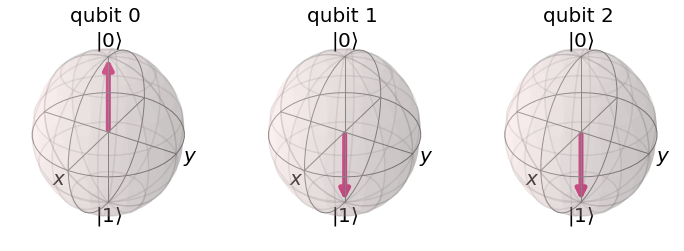

In [84]:
'---------------------------------- simulation -------------------------------------------------'
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc,simulator).result()
#statevector = result.get_statevector()
plot_bloch_multivector(result.get_statevector())


[<qiskit.circuit.instructionset.InstructionSet object at 0x000001F60E0F21D0>, <qiskit.circuit.instructionset.InstructionSet object at 0x000001F60E0F22B0>]
